In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [92]:
df = pd.read_csv('./train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [93]:
for i , column in enumerate(df.columns):
    if column == 'GrLivArea':
        print(i, ':', column, sep='')
    elif column ==  'YearBuilt':
        print(i, ':', column, sep='')

x = df.loc[:, ['GrLivArea', 'YearBuilt']]
y = df.loc[:, ["SalePrice"]]

x1 = df[['GrLivArea']]
x2 = df[['YearBuilt']]

19:YearBuilt
46:GrLivArea


In [94]:
# X,y に代入
X = np.array(x)
y = np.array(y)

# 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

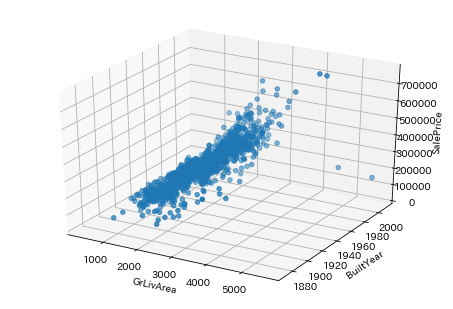

In [95]:
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("GrLivArea")
ax.set_ylabel("BuiltYear")
ax.set_zlabel("SalePrice")

plt.show();

In [96]:
# 欠損の確認
print("リビングの広さの欠損数",df['GrLivArea'].isnull().sum())
print("築年数の欠損数：",df['YearBuilt'].isnull().sum())

リビングの広さの欠損数 0
築年数の欠損数： 0


In [97]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### 学習と推定

In [98]:
# 重回帰（’GrLivArea’と’YearBuilt’を説明変数）
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)              # 予測実行

In [100]:
from sklearn.metrics import mean_squared_error
print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE　test:", mean_squared_error(y_test, y_test_pred ))
MSE_1 = mean_squared_error(y_test, y_test_pred) 

MSE train:  1996735698.780245
MSE　test: 2942066921.672108


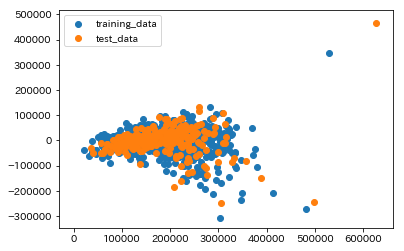

In [101]:
y_pred = lr.predict(X_test)
plt.scatter(y_train_pred, y_train_pred - y_train, label='training_data')
plt.scatter(y_test_pred, y_test_pred - y_test, label='test_data')
plt.hlines(y=0, xmin=-10, xmax=10)
plt.legend()
plt.show();

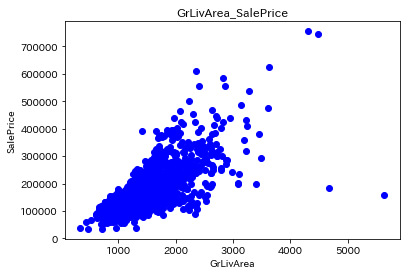

In [102]:
# GrLivAreaのみ
plt.title('GrLivArea_SalePrice')
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.scatter(df['GrLivArea'], df['SalePrice'], c='blue' )
plt.show();
X0 = df['GrLivArea']
y = df['SalePrice']
X0 = X0.values.reshape(-1,1)
y = y.values.reshape(-1, 1)

In [103]:
X0_train, X0_test, y_train, y_test = train_test_split(
    X0, y, test_size=0.2, random_state=0)

In [104]:
lr2 = LinearRegression()
lr2.fit(X0_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_train_pred = lr2.predict(X0_train)
y_test_pred = lr2.predict(X0_test)

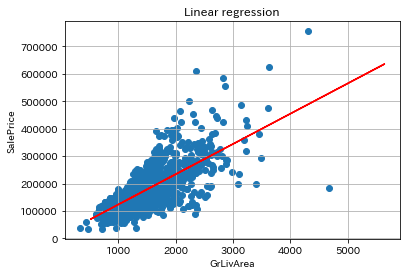

MSE train:  2950044008.2169905
MSE test:   3913788296.4027987


In [106]:
# 散布図
plt.scatter(X0_train, y_train)

# 回帰直線
plt.title('Linear regression')
plt.plot(X0_test, y_test_pred, color='red')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.grid()
plt.show()


print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE test:  ",mean_squared_error(y_test, y_test_pred))


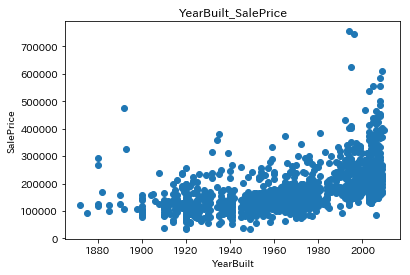

In [107]:
# BuiltYear
plt.title('YearBuilt_SalePrice')
plt.ylabel('SalePrice')
plt.xlabel('YearBuilt')
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.show();
X1 = df['YearBuilt']
y = df['SalePrice']
X1 = X1.values.reshape(-1,1)
y = y.values.reshape(-1, 1)

In [108]:
X1_train, X1_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=0)

In [109]:
lr3 = LinearRegression()
lr3.fit(X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

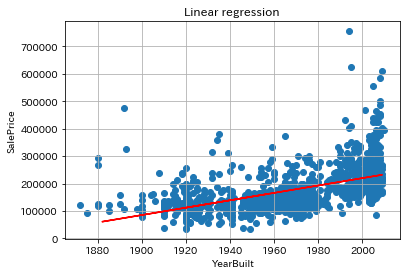

MSE train:  4484156049.7568
MSE test:   4980069536.617276


In [110]:
y_train_pred = lr3.predict(X1_train)
y_test_pred = lr3.predict(X1_test)

# 散布図
plt.scatter(X1_train, y_train)

# 回帰直線
plt.title('Linear regression')
plt.plot(X1_test, y_test_pred, color='red')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE test:  ",mean_squared_error(y_test, y_test_pred))

# 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

## SVM

In [111]:
#複数特徴量
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test) 

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE　test:", mean_squared_error(y_test, y_test_pred ))
MSE_2 = mean_squared_error(y_test, y_test_pred) 

MSE train:  1996735698.780245
MSE　test: 2942066921.672108


/Users/katouyuuya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
# GrLivArea
from sklearn.svm import SVR
svr1 = SVR()
svr1.fit(X0_train, y_train)

/Users/katouyuuya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [113]:
y_train_pred = svr1.predict(X0_train)
y_test_pred = svr1.predict(X0_test)

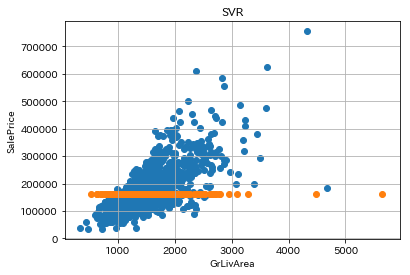

MSE train:  6465658083.178102
MSE test:   7235675277.1212635


In [114]:
# 散布図
plt.scatter(X0_train, y_train)


plt.title('SVR')
plt.scatter(X0_test, y_test_pred)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE test:  ",mean_squared_error(y_test, y_test_pred))

In [115]:
# YearBuilt
svr2 = SVR()
svr2.fit(X1_train, y_train)

/Users/katouyuuya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [116]:
y_train_pred = svr2.predict(X1_train)
y_test_pred = svr2.predict(X1_test)

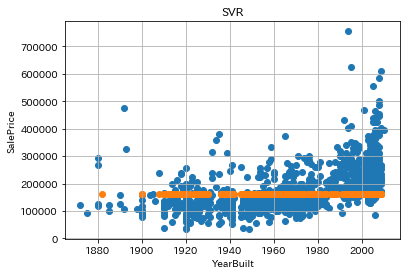

MSE train:  6449183316.629673
MSE test: 7216878529.514652


In [117]:
# 散布図
plt.scatter(X1_train, y_train)

# 回帰直線
plt.title('SVR')
plt.scatter(X1_test, y_test_pred,)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE test:"  ,mean_squared_error(y_test, y_test_pred))

## 決定木

In [118]:
#複数特徴量
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test) 

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE　test:", mean_squared_error(y_test, y_test_pred ))
MSE_3 = mean_squared_error(y_test, y_test_pred) 

MSE train:  19931044.475884706
MSE　test: 3170280931.494673


In [119]:
# GrLivArea
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(random_state=0)
tree1.fit(X0_train, y_train)
sort_idx = X0_train.flatten().argsort()

In [120]:
y_train_pred = tree1.predict(X0_train)
y_test_pred = tree1.predict(X0_test)

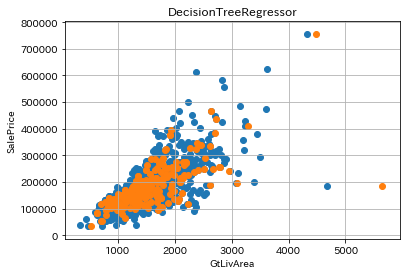

MSE train:  650805493.0003649
MSE test: 5044615714.595755


In [121]:
# 散布図
plt.scatter(X0_train, y_train)

plt.title('DecisionTreeRegressor')
plt.scatter(X0_test, y_test_pred)
plt.xlabel('GtLivArea')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE test:"  ,mean_squared_error(y_test, y_test_pred))

In [122]:
# YearBuilt
tree2 = DecisionTreeRegressor(random_state=0)
tree2.fit(X1_train, y_train)
sort_idx = X1_train.flatten().argsort()

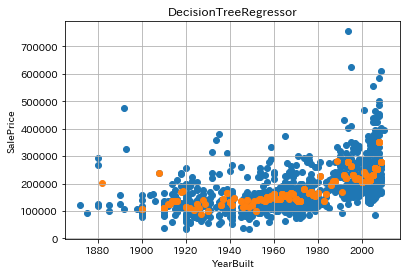

MSE train:  3333494822.176912
MSE test: 4668342580.6888275


In [123]:
y_train_pred = tree2.predict(X1_train)
y_test_pred = tree2.predict(X1_test)
# 散布図
plt.scatter(X1_train, y_train)

plt.title('DecisionTreeRegressor')
plt.scatter(X1_test, y_test_pred, lw=1)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE test:"  ,mean_squared_error(y_test, y_test_pred))

# ランダムフォレスト

In [124]:
#複数特徴量
from sklearn.ensemble import RandomForestRegressor 
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test) 

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE　test:", mean_squared_error(y_test, y_test_pred ))
MSE_4 = mean_squared_error(y_test, y_test_pred) 

MSE train:  255530243.94341037
MSE　test: 1767550840.7538314


/Users/katouyuuya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [125]:
# GrLivArea
from sklearn.ensemble import RandomForestRegressor
forest1 = RandomForestRegressor(random_state=0)
forest1.fit(X0_train, y_train)

/Users/katouyuuya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

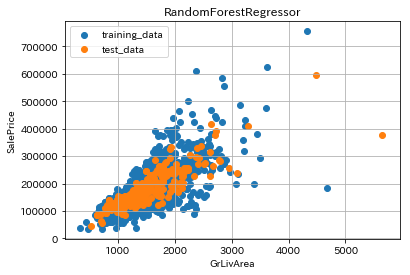

MSE train:  1063088514.3083044
MSE test: 4128017865.711973


In [126]:
y_train_pred = forest1.predict(X0_train)
y_test_pred = forest1.predict(X0_test)

# 散布図
plt.scatter(X0_train, y_train, label='training_data')

plt.title('RandomForestRegressor')
plt.scatter(X0_test, y_test_pred, label='test_data')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.grid()
plt.legend()
plt.show()

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE test:"  ,mean_squared_error(y_test, y_test_pred))

/Users/katouyuuya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


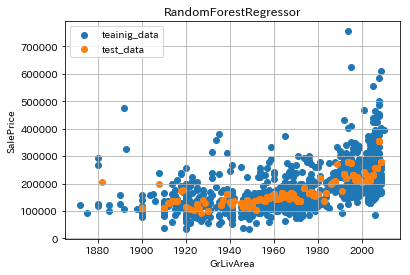

MSE train:  3342119411.02688
MSE test: 4663628902.61201


In [127]:
# YearBuilt
forest2 = RandomForestRegressor(random_state=0)
forest2.fit(X1_train, y_train)

y_train_pred = forest2.predict(X1_train)
y_test_pred = forest2.predict(X1_test)

# 散布図
plt.scatter(X1_train, y_train, label='teainig_data')

plt.title('RandomForestRegressor')
plt.scatter(X1_test, y_test_pred, label='test_data')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.grid()
plt.legend()
plt.show()


print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE test:"  ,mean_squared_error(y_test, y_test_pred))

In [141]:
MSE_list = pd.DataFrame({'LR':[MSE_1],
                                              'SVM':[MSE_2],
                                              'TREE':[ MSE_3],
                                              'FOREST':[MSE_4]}, 
                                               index=['MSE'])

In [142]:
MSE_list

,LR,SVM,TREE,FOREST
MSE,2.942067e+09,2.942067e+09,3.170281e+09,1.767551e+09


<strong>[考察]</strong><br>
上記のMSE結果からランダムフォレストの値がもっとも低くなった。
可視化したデータについてtrainingのデータの中に収まっている。